# Lab 4 Control theory, B03-04

#**Important information**
> **LAB Assignment** \
**Tasks for lab assignment 3:** ...\
**Deadline for lab assignment 3:** ....\
**File name for assignment submission:** `yourname_group.ipynb` (example: `IvanovIvan_B03.ipynb`) 

>**FEEDBACK** \
Feedback form is available by the [link](https://docs.google.com/forms/d/1Q8dyBbCRiY-oy9jY2ujxd2y8EBxlULzXsXOVghTeHiQ/edit).
You are welcome to ask a questions about the practice sessions here.

# Lyapunov theory

## Positive semi definite matrix:

A positive semidefinite matrix is defined as a symmetric matrix with non-negative eigenvalues. The original definition is that a matrix $M \in \mathbb{R}^{n \times n}$ is positive semidefinite iff,

1. M is symmetric
2. $v^T M v \geq 0$ for all $ v \in \mathbb{R}^n$

then it is called positive definite. When the matrix satisfies opposite inequality it is called negative definite. The two definitions for positive semidefinite matrix turn out be equivalent.

**Theorem**. For a symmetric $n × n$ matrix $M \in \mathbb{R}^{n\times n}$, following are equivalent.
1. $v^T M v \geq 0$ for all $v \in \mathbb{R}^n$ .
2. All the eigenvalues are non-negative.

***Proof***:  
Let $v$ be an arbitrary vector. Using the eigenvalue decomposition, we have:
$$ v^⊤ A v= (v^⊤ U) diag(\lambda)(U^⊤ v )= ∑_{i=1..n} \lambda_i ([v^⊤ T]_i)^2 $$

where $U$ is a matrix containing the $n$ orthogonal eigenvectors of $A$. The above expression is non-negative for all $v$ if and only if $\lambda_i \geq 0$ for all $i=1,…,n$ 


## Lyapunov equations:

**Continuous Case**

Given $\dot{{x}} = {A}{x}$ and $V = {x}^\top{S}{x} \geq 0$, let's find its derivative:

\begin{equation}
    \dot V({x}) = \dot{{x}}^\top{S}{x} + 
    {x}^\top{S}\dot{{x}}
\end{equation}

\begin{equation}
    \dot V({x}) = ({A}{x})^\top{S}{x} + 
    {x}^\top{S}{A}{x} = 
    {x}^\top({A}^\top{S} + {S}{A}){x}
\end{equation}

Notice that $\dot V(x)$ should be negative for all ${x}$ for the system to be stable, meaning that ${A}^\top{S} + {S}{A}$ should be negative semidefinite. A more strict form of this requirement is **Lyapunov equation**:

\begin{equation}
    {A}^\top{S} + {S}{A} = -{Q}
\end{equation}

where ${Q}$ is a positive-definite matrix.

**Discrete Case**

Consider dynamics ${x}_{i+1} = {A}{x}_i$ and $V = {x}_i^\top{S}{x}_i \geq 0$, let's find $V({x}_{i+1}) - V({x}_i)$:

\begin{equation}
    V({x}_{i+1}) - V({x}_i) = ({A}{x}_i)^\top{S}{A}{x}_i - 
    {x}_i^\top{S}{x}_i
\end{equation}
\begin{equation}
    V({x}_{i+1}) - V({x}_i) = {x}_i^\top({A}^\top{S}{A} - {S}){x}_i
\end{equation}

Notice that $V({x}_{i+1}) - V({x}_i)$ should be negative for all ${x}_i$ for the system to be stable, meaning that ${A}^\top{S}{A} - {S}$ should be negative semidefinite. A more strict form of this requirement is **Discrete Lyapunov equation**:

\begin{equation}
    {A}^\top{S}{A} - {S} = -{Q}
\end{equation}

where ${Q}$ is a positive-definite matrix.

**To sum up:**

Lyapunov equations for continious systems has the form:
$$A^{\top} P + PA  =-Q$$
and for discrete systems 
$$A^{\top} P A - P = -Q$$
As long as there exists such positive definite $P$ that Lyapunov equations holds for a positive definite $Q$, the system is stable.

Let's see it in code:

In [ ]:
import numpy as np
from scipy.linalg import solve_continuous_lyapunov
from scipy.linalg import solve_discrete_lyapunov
from scipy.linalg import eig

############ continuous case ##############
Q = np.array([[-1, 0], [0, -1]])
A = np.array([[-10, 5], [-5, -10]])
e, v = eig(A)
eq, vq = eig(Q)
print("eig(A):\n", e)
print("eig(Q):\n", eq)

P = solve_continuous_lyapunov(A, Q)
print("P", P)
e, v = eig((A.transpose().dot(P) + P.dot(A)))
print("eig(A'P + P*A):\n", e)
print(" ")
print(" ")

############ discrete case ##############
A = np.array([[-1, -1], [-2, 0.1]])
Q = np.array([[1, 0], [0, 1]])
e, v = eig(A)
eq, vq = eig(Q)
print("eig(A):\n", e)
print("eig(Q):\n", eq)

P = solve_discrete_lyapunov(A, Q)
e, v = eig(P)
print("eig P", e)
print("(A'PA - P + Q ):")
print(((A.dot(P)).dot(A.transpose()) - P + Q))


eig(A):
 [-10.+5.j -10.-5.j]
eig(Q):
 [-1.+0.j -1.+0.j]
P [[ 5.00000000e-02  7.34706413e-20]
 [-1.24900090e-18  5.00000000e-02]]
eig(A'P + P*A):
 [-1.+0.j -1.+0.j]
 
 
eig(A):
 [-1.96739909+0.j  1.06739909+0.j]
eig(Q):
 [1.+0.j 1.+0.j]
eig P [-0.34202233+0.j -8.07007444+0.j]
(A'PA - P + Q ):
[[-8.8817842e-16 -8.8817842e-16]
 [-4.4408921e-16 -8.8817842e-16]]


## The indirect method of Lyapunov


The indirect method of Lyapunov uses the linearization of a system to determine the local stability of the original system. Consider the system
$$ \dot x = f(x,t) $$
with $f(0,t) = 0 $ for all $ t \ge 0 $. Define
$$ A(t) =  \dfrac{\partial f(x,t)}{\partial x} \bigg|_{x=0} $$
to be the Jacobian matrix of $f(x,t)$ with respect to $x$, evaluated at the origin. It follows that for each fixed $t$, the remainder
$$ f_1 (x,t) = f(x,t) - A(t)x $$
approaches zero as $x$ approaches zero. 
$$ \dot z = A(t)z $$
is referred to as the (uniform) *linearization* of equation
$$ \dot x = f(x,t) \quad x(t_0)=x_0 \quad x \in \mathbb{R^n} $$
about the origin. When the linearization exists, its stability determines the local stability of the original nonlinear equation.




## Examples:

### Example 1: Test the following systems' stability:



$$x_{i+1} = 
\begin{pmatrix} 1.5 & 0.2 \\ -0.15 & 0.23
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -1 & -1 \\ -2 & 0.1
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -3 & -1 \\ -1.5 & -10.3
\end{pmatrix}
x_i
$$


$$x_{i+1} = 
\begin{pmatrix} -0.2 & -1 \\ 1.7 & 1.1
\end{pmatrix}
x_i
$$

###Example 2: Test the stability for the continious systems with the same state matrices:



$$\dot x = 
\begin{pmatrix} 1.5 & 0.2 \\ -0.15 & 0.23
\end{pmatrix}
x
$$


$$\dot x = 
\begin{pmatrix} -1 & -1 \\ -2 & 0.1
\end{pmatrix}
x
$$


$$\dot x = 
\begin{pmatrix} -3 & -1 \\ -1.5 & -10.3
\end{pmatrix}
x
$$


$$\dot x = 
\begin{pmatrix} -0.2 & -1 \\ 1.7 & 1.1
\end{pmatrix}
x
$$

### Example 3: Investigate the stability of the zero solution of the system 

$$ \dfrac{\mathrm{d}x}{\mathrm{d}t} = -2x, \dfrac{\mathrm{d}y}{\mathrm{d}t} = x-y $$



**Solution**

This system is a linear homogeneous system with constant coefficients. We take as a Lyapunov function the quadratic form

$$ V (X) = V(x, y) = ax^2 + by^2,$$

where the coefficients $a,b$ are to be determined.

Obviously, the function $V(x,y)$ is positive everywhere except at the origin, where it is zero. We calculate the total derivative of the function $V(x,y)$:

$$ \dfrac{\mathrm{d}V}{\mathrm{d}t} = \dfrac{\partial V}{\partial x} \dfrac{\mathrm{d}x}{\mathrm{d}t} + \dfrac{\partial V}{\partial y} \dfrac{\mathrm{d}y}{\mathrm{d}t} = 2ax (-2x) + 2by(x-y) = -4ax^2 + 2bxy - 2by^2 = -2b \left( \dfrac{4a}{2b} x^2 - xy + y^2 \right) = -2b \left( \dfrac{2a}{b} x^2 - xy + y^2 \right) $$

The expression in the brackets can be converted to a square of the difference if the following condition is satisfied:

$$ \dfrac{2a}{b} = \dfrac{1}{4} \quad \text{or} \quad 8a = b $$

We can take any suitable combination, for example, we set $a=1$, $b=8$. Then the derivative becomes

$$ \dfrac{\mathrm{d}V}{\mathrm{d}t} = -16 \left(  \dfrac{x^2}{4} -xy + y^2 \right) = -16 \left(  \dfrac{x}{2} - y\right)^2 < 0 $$

Thus, for the given system, there is a Lyapunov function, and its derivative is negative everywhere except at the origin. Hence, the zero solution of the system is asymptotically stable (stable node).


### Example 4: Investigate the stability of the zero solution of the system

$$ \dfrac{\mathrm{d}x}{\mathrm{d}t} = y, \dfrac{\mathrm{d}y}{\mathrm{d}t} = -x $$




**Solution.**

$ A = \begin{bmatrix}
0 & 1 \\
-1 & 0 
\end{bmatrix}, det (A - \lambda I) = 0, \implies \begin{vmatrix}
- \lambda & 1\\
-1 & - \lambda
\end{vmatrix} = 0, \implies \lambda ^2 + 1 = 0, \implies \lambda_{1,2} = \pm i $ 

We use the method of Lyapunov functions for the stability analysis. Let the function $V(X)$ have the form

$$ V (X) = V(x,y) = x^2 + y^2 $$

We calculate the derivative of the function $V(X)$ by virtue of the system:

$$ \dfrac{\mathrm{d}V}{\mathrm{d}t} =  \dfrac{\partial V}{\partial x} \dfrac{\mathrm{d}x}{\mathrm{d}t} + \dfrac{\partial V}{\partial y} \dfrac{\mathrm{d}y}{\mathrm{d}t} = 2x \cdot y + 2y \cdot (-x) \equiv	0 $$

Thus, the derivative is identically zero. Hence, the function $V(X)$ is a Lyapunov function and the zero solution of the system is stable in the sense of Lyapunov. The condition of asymptotic stability is not satisfied (for this, the derivative $ \dfrac{\mathrm{d}V}{\mathrm{d}t} $ must be negative).

### Example 5: Investigate the stability of the zero solution of the nonlinear system 
$$ \dfrac{\mathrm{d}x}{\mathrm{d}t} =-xy^2, \dfrac{\mathrm{d}y}{\mathrm{d}t} = -y-yx^2 $$


**Solution**

First we determine the Jacobian of the system at the point $(0,0)$:

$$ J = \begin{bmatrix} \dfrac{\partial f_1}{\partial x} & \dfrac{\partial f_1}{\partial y} \\ \dfrac{\partial f_2}{\partial x} & \dfrac{\partial f_2}{\partial y} \end{bmatrix} \Bigg|_{x=0,y=0} = \begin{bmatrix} -y^2 & -2xy \\ -2xy & -1-x^2 \end{bmatrix} \Bigg|_{x=0,y=0} = \begin{bmatrix} 0 & 0 \\ 0 & -1 \end{bmatrix} $$

Find the eigenvalues of this matrix:

$ \det (J - \lambda I)=0, \implies \begin{bmatrix} - \lambda & 0 \\ 0 & -1-\lambda \end{bmatrix} = 0, \implies \lambda (1 + \lambda ) = 0, \lambda_1 = 0, \lambda_2 = -1 $

Let’s see what results can be obtained using a Lyapunov function. We choose as a Lyapunov function the quadratic form

$$ V(X) = V(x,y) = x^2 + y^2 $$

which is positive definite everywhere except at the origin. Calculate the total derivative:

$$ \dfrac{\mathrm{d}V}{\mathrm{d}t} =  \dfrac{\partial V}{\partial x} \dfrac{\mathrm{d}x}{\mathrm{d}t} + \dfrac{\partial V}{\partial y} \dfrac{\mathrm{d}y}{\mathrm{d}t} = 2x (-y -yx^2) = -2x^2y^2 - 2y^2 -2x^2y^2 = -4x^2y^2 - 2y^2 = -2y^2(2x^2+1) $$


The derivative $ \dfrac{\mathrm{d}V}{\mathrm{d}t} $ is negative everywhere except the points $ (c,0),c \in {\mathbb{R}} $, where it is equal to zero. This means that the zero solution is stable (in the sense of Lyapunov).

### Example 6: Linear harmonic oscillator



Consider a damped harmonic oscillator, as shown in the figure below The dynamics of the system are given by the equation

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1qupMHoQQwIk1HPL9lNN_6YwX08Bo42py" align="center" hspace="350px" vspace="0px"></p>

$$ M\ddot q + B \dot q + K q = 0 $$

where $M$ , $B$, and $K$ are all positive quantities. As a state space equation we rewrite equation as

$$ \dfrac{\mathrm{d}}{\mathrm{d}t} \begin{bmatrix} q \\ \dot q \end{bmatrix} =  \begin{bmatrix} \dot q \\ -K(/M)q - (B/M)\dot q \end{bmatrix} $$

Define $x = (q, \dot q)$ as the state of the system.

Since this system is a linear system, we can determine stability by examining the poles of the system. The Jacobian matrix for the system
is

$$ A = \begin{bmatrix} 0 & 1 \\ -K/M & -B/M \end{bmatrix} $$

which has a characteristic equation

$$ \lambda^2 + (B/M)\lambda + (K/M) = 0 $$

The solutions of the characteristic equation are

$$ \lambda = \dfrac{-b \pm \sqrt{B^2-4KM}}{2M} $$

which always have negative real parts, and hence the system is (globally) exponentially stable.

We now try to apply Lyapunov’s direct method to determine exponential stability. The “obvious Lyapunov function to use in this context is the energy of the system,

$$ V(x,t) = \dfrac{1}{2}M \dot q^2 + \dfrac{1}{2}K  q^2 $$

Taking the derivative of V along trajectories of the system gives

$$ \dot V = M \dot q \ddot q + K q \dot q = -B\dot{q}^2 $$

The function $-\dot V$ is quadratic and always negative thus the system is stable which confirm what we have found so far.

eig(A):
 [-1.+2.j -1.-2.j]


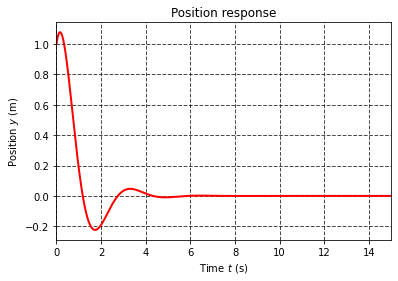

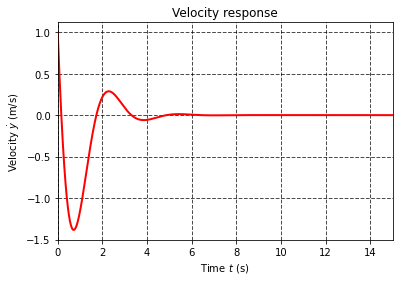

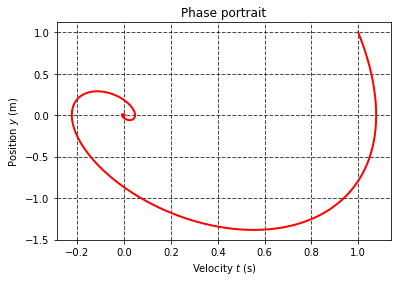

In [ ]:
from numpy import dot, linspace
from scipy.integrate import odeint # import integrator routine
import numpy as np 
from scipy.linalg import eig

m = 1
b = 2
k = 5
A = np.array([[0,1],
     [-k/m, -b/m]])

e, v = eig(A)
print("eig(A):\n", e)

def mbk_ode(x, t, A):
    dx = dot(A,x)
    return dx

t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span

x0 = [1,1]
x_sol = odeint(mbk_ode, x0, t, args=(A,)) # integrate system "sys_ode" from initial state $x0$
y, dy = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

from matplotlib.pyplot import *

title(r'Position response')
plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

title(r'Velocity response')
plot(t, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(y, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Position ${y}$ (m)')
xlabel(r'Velocity $t$ (s)')
show()